# Yolo

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/tools/yolo.ipynb)

Yolo est un ensemble de modèles de [vision par ordinateur](../use-cases/computer-vision.ipynb) dévelopés par [Ultralytics](https://github.com/ultralytics/ultralytics) pour:
- Détection d’objets : Identifier et localiser des objets dans une image.
- Classification d’images : Classer des images dans des catégories prédéfinies.
- Segmentation d’images : Détecter des objets et délimiter leurs contours.
- Estimation de poses : Détecter et suivre les points clés sur les corps humains.
- Détection d’objets orientés (OBB) : Détecter des objets avec rotation pour une précision accrue.

Docs:
- https://yolov11.com/
- https://github.com/ultralytics/ultralytics

In [19]:
import os
import sys

# Supprimer les commentaires pour installer (requirements.txt)
# !pip3 install -q -U ipywidgets
# !pip3 install -q -U matplotlib
# !pip3 install -q -U opencv-python
# !pip3 install -q -U tqdm

# À installer dans tous les cas pour Google Colab et Github
if 'google.colab' in sys.modules or 'CI' in os.environ:
    !pip3 install -q -U ultralytics

In [20]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.16 🚀 Python-3.9.6 torch-2.1.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 210.8/228.3 GB disk)


In [21]:
# Cette variable python est accessible depuis les commandes shell
work_directory = './yolo'

# Récupération des données (notamment pour Google Colab)
!curl --create-dirs -O --output-dir $work_directory 'https://raw.githubusercontent.com/digillia/Digillia-Colab/main/data/fruit_basket.jpeg'
!curl --create-dirs -O --output-dir $work_directory 'https://raw.githubusercontent.com/digillia/Digillia-Colab/main/data/soccer_game.jpeg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  214k  100  214k    0     0  1230k      0 --:--:-- --:--:-- --:--:-- 1233k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  660k  100  660k    0     0  2294k      0 --:--:-- --:--:-- --:--:-- 2302k


In [22]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

## Détection d'objets

In [23]:
# Charger un modèle de base
# Voir https://docs.ultralytics.com/tasks/detect/#models
model = YOLO("yolo11n.pt") 

100%|██████████| 5.35M/5.35M [00:00<00:00, 87.1MB/s]


In [24]:
# Détection d'objets sur une image de taille 640*640
results = model("./yolo/fruit_basket.jpeg") 


image 1/1 /Users/jlchereau/WebstormProjects/Digillia/Digillia-Colab/tools/yolo/fruit_basket.jpeg: 640x640 1 bowl, 1 banana, 2 apples, 3 oranges, 125.4ms
Speed: 7.4ms preprocess, 125.4ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)


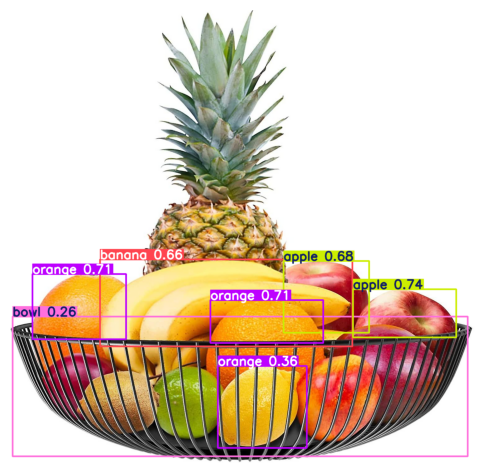

In [25]:
# Image avec détection
img = results[0].plot()

# Affichage de l'image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Classification d'images

In [26]:
# Charger un modèle de base
# Voir https://docs.ultralytics.com/tasks/classify/#models
model = YOLO("yolo11n-cls.pt")  # load an official model

100%|██████████| 5.52M/5.52M [00:00<00:00, 58.3MB/s]


In [27]:
# Classification d'une image de taille 640*640
results = model("./yolo/fruit_basket.jpeg") 


image 1/1 /Users/jlchereau/WebstormProjects/Digillia/Digillia-Colab/tools/yolo/fruit_basket.jpeg: 224x224 orange 0.33, banana 0.24, pineapple 0.23, corn 0.02, croquet_ball 0.02, 59.4ms
Speed: 143.4ms preprocess, 59.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [28]:
# Résultats de la classification
probabilities = results[0].probs  # Access the Probs object for the first image

# Classification principale
top_class_id = probabilities.top1  # Index of the class with the highest probability
top_class_confidence = probabilities.top1conf.item()  # Confidence score of the top class
top_class_name = model.names[top_class_id]  # Assuming `model.names` contains the class names

# Affichage
print(f"Predicted Class: {top_class_name}, Confidence: {top_class_confidence:.2f}")

Predicted Class: orange, Confidence: 0.33


## Segmentation d'images

In [29]:
# Charger un modèle de base
# Voir hhttps://docs.ultralytics.com/tasks/segment/#models
model = YOLO("yolo11n-seg.pt") 

In [30]:
# Segmentation d'une image de taille 640*640
results = model("./yolo/fruit_basket.jpeg") 


image 1/1 /Users/jlchereau/WebstormProjects/Digillia/Digillia-Colab/tools/yolo/fruit_basket.jpeg: 640x640 1 bowl, 1 banana, 2 apples, 4 oranges, 124.7ms
Speed: 2.4ms preprocess, 124.7ms inference, 26.3ms postprocess per image at shape (1, 3, 640, 640)


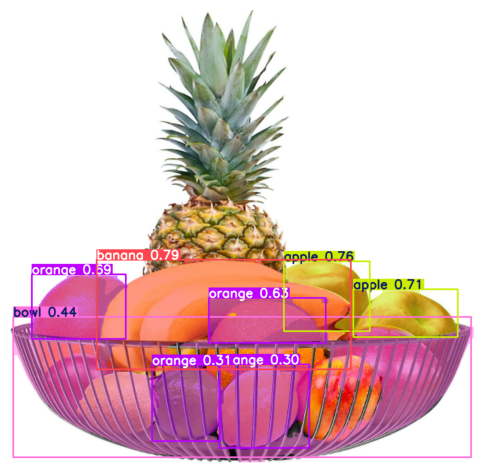

In [31]:
# Image avec segmentation
img = results[0].plot()

# Affichage avec matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Estimation de poses

In [32]:
# Charger un modèle de base
# Voir hhttps://docs.ultralytics.com/tasks/pose/#models
model = YOLO("yolo11n-pose.pt") 

In [33]:
# Estimation de poses sur une image de taille 640*640
results = model("./yolo/soccer_game.jpeg") 


image 1/1 /Users/jlchereau/WebstormProjects/Digillia/Digillia-Colab/tools/yolo/soccer_game.jpeg: 384x640 7 persons, 45.7ms
Speed: 1.5ms preprocess, 45.7ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


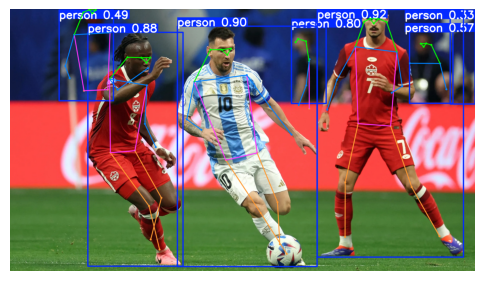

In [34]:
# Image avec poses
img = results[0].plot()

# Affichage avec matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [35]:
# Ménage
!rm -f ./yolo11n.pt
!rm -f ./yolo11n-cls.pt
!rm -f ./yolo11n-seg.pt
!rm -f ./yolo11n-pose.pt
# !rm -f ./yolo11n-obb.pt
!rm -rf $work_directory